# XD.

In [8]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from astroML.utils.decorators import pickle_results
from astroML.density_estimation import XDGMM
from astroML.plotting.tools import draw_ellipse

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [9]:
import pandas as pd
xd = pd.read_csv("xd.csv")

(0, 10)

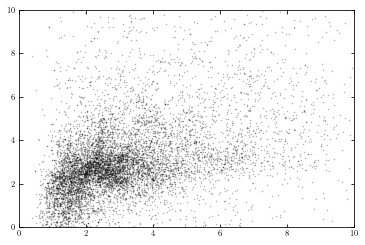

In [10]:
iso = xd.iso_age.values
kin = xd.kin_age.values
kin_age_err = 1.

# stack the results for computation
X = np.vstack([iso, kin]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
diag = np.arange(X.shape[-1])
Xerr[:, diag, diag] = np.vstack([xd.iso_age_err.values ** 2, (np.ones_like(kin)*kin_age_err) ** 2]).T

plt.plot(iso, kin, 'k.', ms=1, alpha=.3)
plt.xlim(0, 10)
plt.ylim(0, 10)

In [11]:
#------------------------------------------------------------
# compute and save results
@pickle_results("XD_toy.pkl")
def compute_XD_results(n_components=10, max_iter=500):
    clf = XDGMM(n_components, max_iter=max_iter)
    clf.fit(X, Xerr)
    return clf

clf = compute_XD_results(10, 500)

@pickle_results: using precomputed results from 'XD_toy.pkl'


In [14]:
sample = clf.sample(2000)

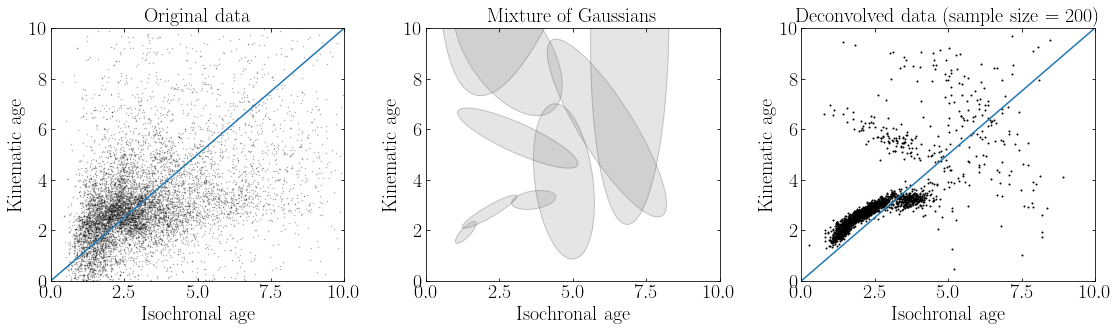

In [15]:
plotpar = {'axes.labelsize': 20,
           'font.size': 20,
           'xtick.labelsize': 20,
           'ytick.labelsize': 20,
           'text.usetex': True}
plt.rcParams.update(plotpar)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(16, 5))
# fig.subplots_adjust(left=0.1, right=0.95,
#                     bottom=0.1, top=0.95,
#                     wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(131)
ax1.plot(iso, kin, "k.", ms=1, alpha=.3)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10);
xs = np.linspace(0, 10, 100)
ax1.plot(xs, xs)
ax1.set_xlabel("Isochronal age")
ax1.set_ylabel("Kinematic age")
ax1.set_title("Original data", fontsize=20)

ax2 = fig.add_subplot(132)
for i in range(clf.n_components):
    draw_ellipse(clf.mu[i], clf.V[i], scales=[2], ax=ax2,
                 ec='k', fc='gray', alpha=0.2)
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
ax2.set_xlabel("Isochronal age")
ax2.set_ylabel("Kinematic age")
ax2.set_title("Mixture of Gaussians", fontsize=20)
    
ax3 = fig.add_subplot(133)
ax3.scatter(sample[:, 0], sample[:, 1], s=4, lw=0, c='k')
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10);
ax3.plot(xs, xs)
ax3.set_xlabel("Isochronal age")
ax3.set_ylabel("Kinematic age");
ax3.set_title("Deconvolved data (sample size = 200)", fontsize=20);

plt.tight_layout()

In [17]:
save_df = pd.DataFrame(dict({"iso_age": sample[:, 0], "kin_age": sample[:, 1]}))
save_df.to_csv("../../data/xd_results.csv")

In [46]:
sample2 = clf.sample(6000)

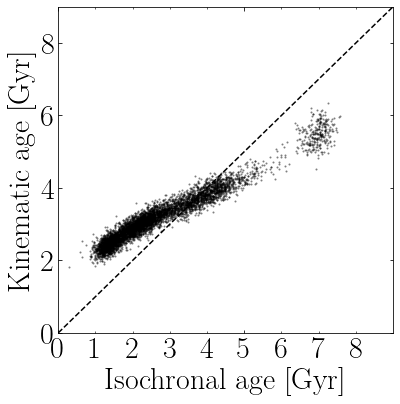

In [51]:
plotpar = {'axes.labelsize': 30,
                  'font.size': 22,
                  'legend.fontsize': 15,
                  'xtick.labelsize': 30,
                  'ytick.labelsize': 30,
                  'text.usetex': True}
plt.rcParams.update(plotpar)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.scatter(sample2[:, 0], sample2[:, 1], s=4, lw=0, c='k', rasterized=True, alpha=.5)
ax.set_xlim(0, 9)
ax.set_ylim(0, 9);
ax.plot(xs, xs, "k", ls="--")

import matplotlib
ax.xaxis.set_minor_formatter(
    matplotlib.ticker.FormatStrFormatter("$%.0f$"))
ax.xaxis.set_major_formatter(
    matplotlib.ticker.FormatStrFormatter("$%.0f$"))
ax.set_xticks([0, 1, 2, 3, 4, 6, 7, 8], minor=True)

ax.set_xlabel("Isochronal age [Gyr]")
ax.set_ylabel("Kinematic age [Gyr]");

plt.savefig("XD_result")
plt.savefig("XD_result.pdf")